In [1]:
# optimization

In [2]:
# basic imports
%matplotlib inline
import numpy as np
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
def f(x):
    return x * torch.cos(np.pi *x) # true signal

def g(x):
    return f(x) + 0.2 * torch.cos(5 *np.pi*x) # you get more frequencies as noise

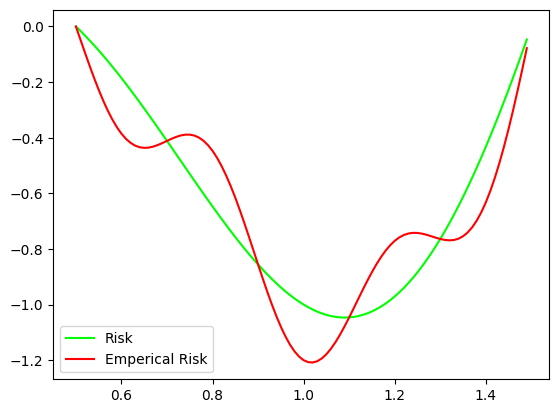

In [4]:
x = torch.arange(0.5,1.5,0.01)
f_x = map(f,x)
g_x = map(g,x)
fig,ax = plt.subplot_mosaic("A")
ax["A"].plot(x,list(f_x),color=[0,1,0],label="Risk")
ax["A"].plot(x,list(g_x),color=[1,0,0],label="Emperical Risk")
plt.legend()
plt.show()

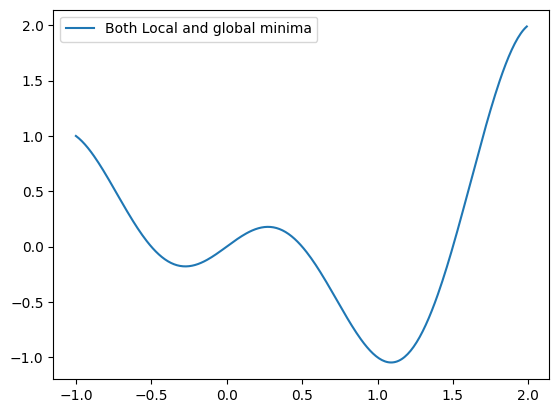

In [5]:
# Local Minima

# first derivative is 0

x = torch.arange(-1,2,0.01)
f_x = map(f,x)
plt.plot(x,list(f_x),label="Both Local and global minima")
plt.legend();plt.show()

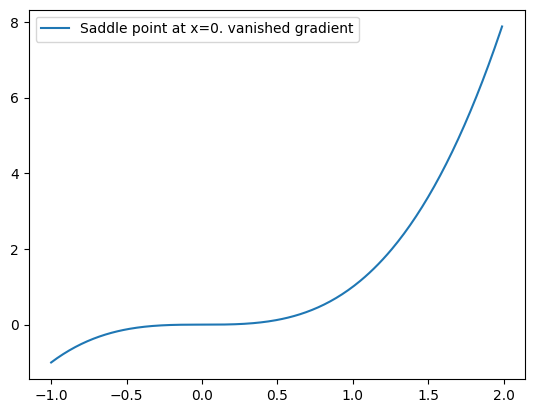

In [6]:
# saddle points
# a gradient can vanish at saddle points too
plt.plot(x,x**3,label="Saddle point at x=0. vanished gradient")
plt.legend();plt.show()

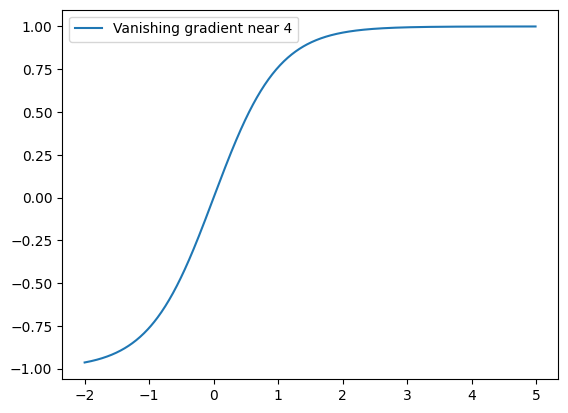

In [7]:
# VANISHING GRADIENT

x = torch.arange(-2,5,0.01)
plt.plot(x,torch.tanh(x),label="Vanishing gradient near 4")
plt.legend() ; plt.show()

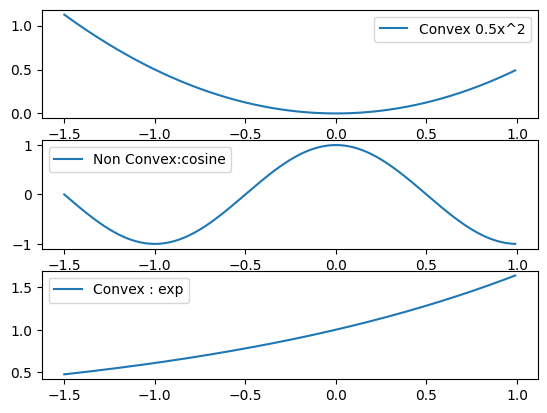

In [8]:
# CONVEXITY

f = lambda x:0.5 * (x**2) # convex f(.)
g = lambda x:torch.cos(np.pi *x) # non convex f(.)
h = lambda x:torch.exp(0.5*x) # convex f(.)

x = torch.arange(-1.5,1,0.01)
fig,ax = plt.subplot_mosaic("A;B;C")
ax["A"].plot(x,list(map(f,x)),label="Convex 0.5x^2")
ax["B"].plot(x,list(map(g,x)),label="Non Convex:cosine")
ax["C"].plot(x,list(map(h,x)),label="Convex : exp")

for k in ax.keys():
    ax[k].legend()
plt.show()


In [33]:
# calculating the hessian
fxy = lambda x,y: 3*(x**2) - (x*y) + 2*(y**2) -4*x -7*y + 12


hessian = torch.autograd.functional.hessian
# since here the hessian matrix is just constant input values dont matter
inputs=(torch.tensor(40.) , torch.tensor(20.))
hessian_fxy = torch.tensor(hessian(fxy,inputs))
hessian_fxy

tensor([[ 6., -1.],
        [-1.,  4.]])

In [34]:
# |H2| = 6*4 - 1 > 0 so its not a saddle point
# |H1| = 6 (fxx) >0 therefore its a global minima . if it |H1| < 0 then it would have been a global maxima

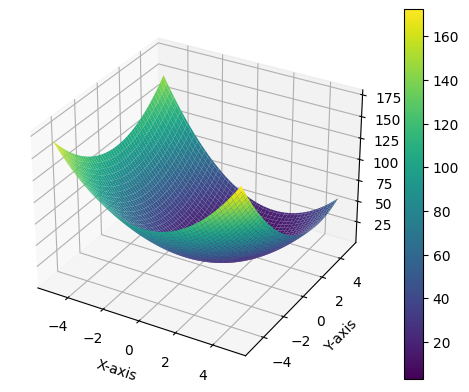

In [41]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x,y = np.meshgrid(x, y)

# Define the function to plot
Z= 3*(x**2) - (x*y) + 2*(y**2) -4*x -7*y + 12

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and a color bar
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
fig.colorbar(surf)

# Show the plot
plt.show()


In [48]:
# As the hessian first and second principal component (fxx and determinant ) said this has a global optima

In [52]:
# calculating the hessian
fxy = lambda x,y: -3*(x**2) - (x*y) - 2*(y**2) -4*x -7*y + 12


hessian = torch.autograd.functional.hessian
# since here the hessian matrix is just constant input values dont matter
inputs=(torch.tensor(40.) , torch.tensor(20.))
hessian_fxy = torch.tensor(hessian(fxy,inputs))
hessian_fxy


tensor([[-6., -1.],
        [-1., -4.]])

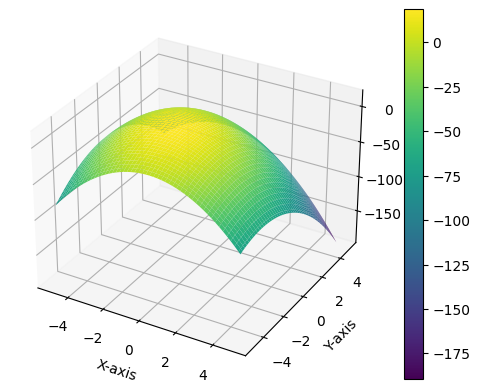

In [53]:
# this time fxx < 0 and H2 > 0 so its the case of global optima

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x,y = np.meshgrid(x, y)

# Define the function to plot
Z= -3*(x**2) - (x*y) -2*(y**2) -4*x -7*y + 12

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and a color bar
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
fig.colorbar(surf)

# Show the plot
plt.show()


In [ ]:
# as the hessian said its going to be

In [49]:
# OPTIMIZERS